In [618]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob

from analytic_wfm.peakdetect import *

%run "Fonctions.ipynb"
%run "Signal.ipynb"

In [259]:
signaux = pd.DataFrame()
files = find_all_extension('../Millau/Resultats/', '.txt')
for elt in files:
    # Récupération des signaux
    siwim_sig = list_multiple_var('A0', var_to=9) + list_multiple_var('A', 10, 21)
    signaux = pd.concat([signaux, recover_sig(elt, siwim_sig)], axis=1)
    
    # Calcul rapport signal à bruit (Plus c'est grand, mieux c'est !)
    all_sig = pd.DataFrame()
    for col in signaux.columns[1:]:
        df = pd.DataFrame([[col, signaux.loc[:,col].std()/signaux.loc[:int(0.3*len(signaux)),col].std()]], columns=["Name", "S/N"])
        all_sig = all_sig.append(df)
signaux
#     # Selection du signal
#     sig = all_sig.reset_index(drop=True).sort_values(by="S/N", ascending=False).iloc[[0],0]
#     best_sig = signaux.loc[:,[signaux.iloc[:,0].name, sig[0]]]
    
#     # Remise à l'échelle 0 du signal
#     signaux = supperposition_signaux(best_sig, 10)
#     signaux.columns = ['time', 'amplitude']
#     sig = Signal("sig-1", signaux)

,time_20170620000334150,A01_20170620000334150,A02_20170620000334150,A03_20170620000334150,A04_20170620000334150,A05_20170620000334150,A06_20170620000334150,A07_20170620000334150,A08_20170620000334150,A09_20170620000334150,...,A12_20170620145918111,A13_20170620145918111,A14_20170620145918111,A15_20170620145918111,A16_20170620145918111,A17_20170620145918111,A18_20170620145918111,A19_20170620145918111,A20_20170620145918111,A21_20170620145918111
0,0.000000,-0.950983,-1.74631,-0.238600,-0.669311,-1.13128,-1.19713,-1.02591,0.306192,-1.51372,...,0.005560,0.007696,0.005293,0.004853,0.003480,-0.004820,0.005762,0.004225,0.001640,-0.000880
1,0.001953,-0.950982,-1.74516,-0.236993,-0.667526,-1.12979,-1.19576,-1.02414,0.306176,-1.51214,...,0.004329,0.006355,0.004047,0.003577,0.002382,-0.005599,0.004138,0.003144,0.001058,-0.000857
2,0.003906,-0.950619,-1.74384,-0.235154,-0.665487,-1.12807,-1.19421,-1.02212,0.306152,-1.51033,...,0.002429,0.004118,0.002175,0.001676,0.000835,-0.005975,0.001791,0.001556,0.000141,-0.000936
3,0.005859,-0.949914,-1.74238,-0.233141,-0.663258,-1.12616,-1.19251,-1.01991,0.306121,-1.50832,...,0.000021,0.001183,-0.000158,-0.000664,-0.001013,-0.005881,-0.001047,-0.000386,-0.001014,-0.001101
4,0.007812,-0.948933,-1.74083,-0.231016,-0.660903,-1.12414,-1.19069,-1.01758,0.306084,-1.50616,...,-0.002682,-0.002181,-0.002735,-0.003210,-0.002981,-0.005302,-0.004093,-0.002493,-0.002285,-0.001330
5,0.009766,-0.947773,-1.73925,-0.228846,-0.658497,-1.12205,-1.18882,-1.01521,0.306041,-1.50394,...,-0.005436,-0.005656,-0.005311,-0.005708,-0.004878,-0.004279,-0.007038,-0.004560,-0.003538,-0.001591
6,0.011719,-0.946557,-1.73769,-0.226704,-0.656120,-1.11998,-1.18694,-1.01287,0.305995,-1.50171,...,-0.007989,-0.008910,-0.007637,-0.007910,-0.006523,-0.002906,-0.009589,-0.006385,-0.004644,-0.001853
7,0.013672,-0.945414,-1.73621,-0.224670,-0.653863,-1.11801,-1.18513,-1.01065,0.305949,-1.49956,...,-0.010105,-0.011633,-0.009489,-0.009598,-0.007760,-0.001316,-0.011489,-0.007796,-0.005489,-0.002083
8,0.015625,-0.944465,-1.73487,-0.222835,-0.651826,-1.11622,-1.18346,-1.00865,0.305903,-1.49760,...,-0.011591,-0.013567,-0.010686,-0.010606,-0.008479,0.000332,-0.012553,-0.008658,-0.005989,-0.002256
9,0.017578,-0.943807,-1.73376,-0.221289,-0.650116,-1.11473,-1.18203,-1.00696,0.305862,-1.49591,...,-0.012315,-0.014530,-0.011113,-0.010839,-0.008621,0.001871,-0.012682,-0.008895,-0.006097,-0.002352


In [452]:
test = []
for elt in final_df.columns:
    if 'time' in elt:
        test.append(elt)
        
final_df[test].isnull().sum()[final_df[test].isnull().sum() == 0].index[0]

NameError: name 'final_df' is not defined

In [ ]:
2017-06-20-00-03-34-150
2017-06-20-00-03-41-144
2017-06-20-00-05-50-623
2017-06-20-00-05-57-142
2017-06-20-00-08-22-224
2017-06-20-00-33-07-871
2017-06-20-00-38-57-400
2017-06-20-00-39-22-968
2017-06-20-00-41-37-410
2017-06-20-00-45-20-611
2017-06-20-00-52-24-732
2017-06-20-00-54-50-955
2017-06-20-00-56-40-892
2017-06-20-00-57-12-093
2017-06-20-00-59-34-488

In [619]:
choix = '2017-06-20-00-05-57-142'

In [620]:
# Récupération des signaux
siwim_sig = list_multiple_var('A0', var_to=9) + list_multiple_var('A', 10, 21)
signaux = recover_sig('../Millau/Resultats\\2017-06-20-hh-mm-ss\\2017-06-20-00-mm-ss\\'+ choix +'.txt', siwim_sig)

In [621]:
# Calcul rapport signal à bruit (Plus c'est grand, mieux c'est !)
all_sig = pd.DataFrame()
for col in signaux.columns[1:]:
    df = pd.DataFrame([[col, signaux.loc[:,col].std()/signaux.loc[:int(0.3*len(signaux)),col].std()]], columns=["Name", "S/N"])
    all_sig = all_sig.append(df)
    
lis = all_sig.reset_index(drop=True).sort_values(by="S/N", ascending=False).iloc[[0],0].apply(lambda x: x.split('_')[0]).tolist()

In [622]:
signaux = recover_sig('../Millau/Resultats\\2017-06-20-hh-mm-ss\\2017-06-20-00-mm-ss\\'+ choix +'.txt', lis)

TypeError: 'float' object is not iterable

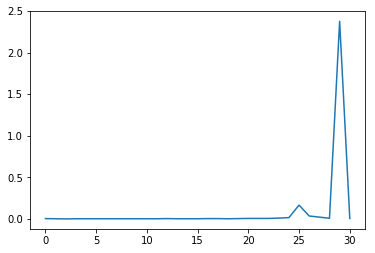

In [623]:
# Somme des signaux
signaux = somme_signaux(signaux)

# Supperposition des signaux
signaux = supperposition_signaux(signaux, 10)
signaux.columns = ['time', 'amplitude']
sig = Signal("sig-1", signaux, lookahead=20, delta=0.2)

KeyError: 'the label [time p1] is not in the [columns]'

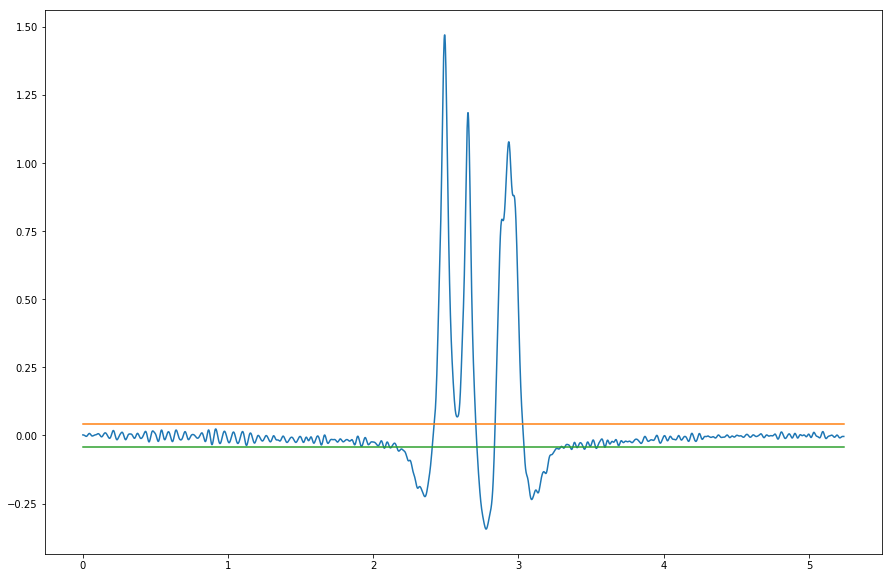

In [583]:
sig.show()

In [ ]:
sig.to_df()

#### Selection meilleur signal

In [234]:
signaux = supperposition_signaux(test)
pics = calcul_pics(signaux, 6, 0.05, 0.15)
best = best_courbe(signaux, pics)

NameError: name 'test' is not defined

In [ ]:
plt.figure(figsize=(15, 10))

# Courbe de capteurs
plt.plot(best[0].iloc[:, 0], best[0].iloc[:, 1])

# Detections des maximas et minimas
plt.scatter(best[1].iloc[:, 0], best[1].iloc[:, 1])

plt.legend([best[0].iloc[:,1].name])
plt.xlabel("Temps")
plt.ylabel("Amplitude")

plt.show()

In [ ]:
var_name = ['pos_min_', 'min_', 'pos_max_', 'max_']
var_list = []

for elt in var_name:
    if elt == var_name[0] or elt == var_name[1]:
        var_list.append(list_multiple_var(elt, 1, len(min_sig)))
    else:
        var_list.append(list_multiple_var(elt, 1, len(max_sig)))

In [ ]:
pos_min = min_sig[[0]].T.reset_index(drop=True)
min_ampl = min_sig[[1]].T.reset_index(drop=True)
pos_max = max_sig[[0]].T.reset_index(drop=True)
max_ampl = max_sig[[1]].T.reset_index(drop=True)

pos_min.columns = var_list[0]
min_ampl.columns = var_list[1]
pos_max.columns = var_list[2]
max_ampl.columns = var_list[3]

In [ ]:
pd.concat([,pos_min, min_ampl, pos_max, max_ampl], axis=1)

#### Somme signaux

In [ ]:
test3['time'] = test.iloc[:,0]
test3['sig'] = test.iloc[:,1] + test.iloc[:,2] + test.iloc[:,3]

In [ ]:
points = peakdetect(test3.iloc[:, 1],test3.iloc[:, 0], lookahead=5, delta=0.04)

In [ ]:
plt.figure(figsize=(15, 10))

# Courbe de capteurs
plt.plot(test3.iloc[:,0], test3.iloc[:, 1])

fourchette = 0.15
plt.plot([0, 5.22], [-fourchette, -fourchette])
plt.plot([0, 5.22], [fourchette, fourchette])

# Detections des maximas et minimas
plt.scatter(np.array(points[0] + points[1]).T[0], np.array(points[0] + points[1]).T[1])

plt.legend(['SUM'])
plt.xlabel("Temps")
plt.ylabel("Amplitude")

plt.show()